# Central Tendency, Dispersion

## Central Tendency

Where is the data _centered_?

1. mean - sensitive to outliers
2. median
3. mode / frequency
4. quantile


### Frequency

Frequency - number of times a value appears in the datast

Can be done with `dict` or `Counter`

In [1]:
import numpy as np

# set up some data...

# kind of like rolling two six-sided dice
rolls = np.random.randint(1, 7, 1000) + np.random.randint(1, 7, 1000)
rolls

array([ 9,  3,  6,  9,  7,  7,  7, 10,  4,  4,  2,  8, 11,  6,  3,  8, 10,
        6, 10,  8,  7,  5,  3,  9,  7,  6,  7,  6,  5,  9, 10,  8,  5,  6,
        4,  8,  6,  7,  6,  9,  4,  8,  4,  2,  8,  2,  8,  4,  8,  8, 10,
       11, 11,  5,  8,  9,  6, 11,  6,  5,  3, 12,  7,  6,  3,  4,  7,  6,
        2,  6,  6,  3, 12,  6,  7,  5,  6,  4,  4,  9,  5,  3,  4,  7,  3,
        3,  6,  7,  7, 12, 10,  5,  6,  8,  9, 10,  6,  5,  7, 10,  6,  7,
        8,  8,  5,  8,  5, 10,  5,  8,  5,  7,  4,  9, 11,  7,  8,  4, 10,
        7, 11,  9,  7,  6,  4,  9,  7,  8,  8,  6,  6,  3,  7,  8,  7, 11,
        4,  4, 10,  3, 10,  7,  7,  7,  9,  7, 10,  3,  3, 10,  9,  4,  5,
        9,  8,  4,  7,  5,  6,  8,  9,  8,  5,  4, 11,  2, 11,  4, 11,  7,
        8,  8, 10,  3,  5,  7,  7,  2,  8,  7,  7,  6,  8, 12,  9,  9,  9,
        5,  6,  9,  9,  9,  8, 10,  8,  7,  2,  5,  6,  7,  9,  4,  7,  4,
        4, 12, 11,  8,  7,  5,  3,  6,  8,  7,  5,  6,  5,  6,  2,  3,  7,
        3,  6,  3,  6,  7

### Counting with a Dictionary

In [113]:
counts = {}
for n in rolls:
   counts[n] = counts.get(n, 0)  + 1
   
counts

{2: 28,
 7: 172,
 8: 116,
 6: 139,
 3: 52,
 5: 108,
 10: 99,
 11: 55,
 4: 86,
 9: 114,
 12: 31}

In [114]:
# also ... with try/except, in, update
counts = {}
for val in rolls:
    try:
        counts[val] += 1
    except:
        counts[val] = 1
print(counts)        

counts = {}
for val in rolls:
    if val in counts:
        counts[val] += 1
    else:
        counts[val] = 1
print(counts)        
        
counts = {}
for val in rolls:
    counts.update({val: counts.get(val, 0) + 1})
print(counts)        

{2: 28, 7: 172, 8: 116, 6: 139, 3: 52, 5: 108, 10: 99, 11: 55, 4: 86, 9: 114, 12: 31}
{2: 28, 7: 172, 8: 116, 6: 139, 3: 52, 5: 108, 10: 99, 11: 55, 4: 86, 9: 114, 12: 31}
{2: 28, 7: 172, 8: 116, 6: 139, 3: 52, 5: 108, 10: 99, 11: 55, 4: 86, 9: 114, 12: 31}


### Counting with Counter

Or, u no... you can just use a `Counter`. It's a sublcass of dictionary; you can pass it a list, and it'll count the items for you. Keys are _things_ you're counting, values are the actual counts.

In [115]:
from collections import Counter
c = Counter(rolls)
c

Counter({2: 28,
         7: 172,
         8: 116,
         6: 139,
         3: 52,
         5: 108,
         10: 99,
         11: 55,
         4: 86,
         9: 114,
         12: 31})

In [116]:
c.most_common()

[(7, 172),
 (6, 139),
 (8, 116),
 (9, 114),
 (5, 108),
 (10, 99),
 (4, 86),
 (11, 55),
 (3, 52),
 (12, 31),
 (2, 28)]

In [117]:
c.most_common(2)

[(7, 172), (6, 139)]

### Mean, Median, and Mode

* mean: _average_ 
* median: "middle" value (half of the values fall under this)
* mode: most frequently occurring value

In [118]:
mean = lambda data: sum(data) / len(data)

In [119]:
def median(data):
    d = sorted(data)
    i = len(d) // 2
    # if even, mean of two middle values
    return d[i] if len(d) % 2 == 1 else mean(d[i-1: i+1])

In [120]:
print(median([1, 2, 3, 5, 6, 7]))
print(median([2, 3, 5, 6, 7]))

4.0
5


In [121]:
mode = lambda data: Counter(data).most_common(1)[0][0]

# of course, we can do with dictionaries as well
def mode(data):
    counts = {}
    for val in rolls:
        if val in counts:
            counts[val] += 1
        else:
            counts[val] = 1
    # y, this is ridiculous, sry!
    return sorted(counts.items(), key=lambda t: t[1])[-1][0] if len(counts) > 0 else None

In [122]:
mode(rolls)

7

In [123]:
median(rolls)

7.0

In [124]:
mean(rolls)

7.055

Text(0, 0.5, 'Roll Result: 1000 rolls')

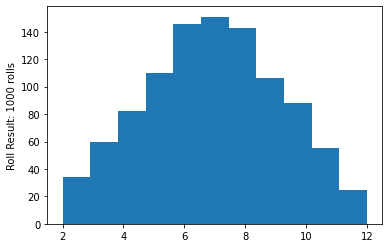

In [6]:
# bonus! what does this data set of rolls actually _look_ like???
import numpy as np
from matplotlib import pyplot as plt
plt.hist(rolls, bins=(max(rolls) - min(rolls)+1))
plt.ylabel('Roll Result: 1000 rolls')

Text(0, 0.5, 'Roll Result: 100,000 rolls')

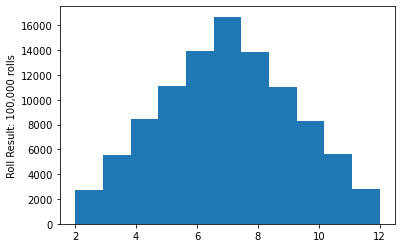

In [8]:
rolls2 = np.random.randint(1, 7, 100000) + np.random.randint(1, 7, 100000)
plt.hist(rolls2, bins=(max(rolls2) - min(rolls2)+1))
plt.ylabel('Roll Result: 100,000 rolls')

<AxesSubplot:>

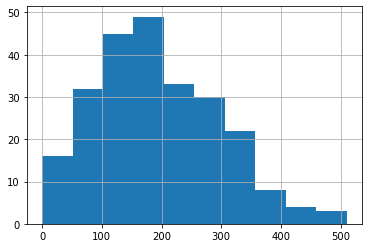

In [127]:
import pandas as pd
starbucks=pd.read_csv('starbucks_drinkMenu_expanded.csv')
starbucks.Calories.hist()

In [128]:
starbucks.Calories.describe()

count    242.000000
mean     193.871901
std      102.863303
min        0.000000
25%      120.000000
50%      185.000000
75%      260.000000
max      510.000000
Name: Calories, dtype: float64

### Percentile / 100-Quantile

Value under which some given percent of ordered data falls. (There are _other_ quantiles, like percentiles, tertiles, quartiles, etc. ...)

In [129]:
quantile = lambda p, data: sorted(data)[int(p * len(data))]

# uh... btw, we're using our book definition here which truncates the index
# ...but there are other methods of finding the index / actual value... such 
# as "nearest rank" (round up) and some sort of interpolation (which means
# value won't actually be in original set!)

In [130]:
nums = [22, 12, 1, 5, 6, 2, 3, 20, 12, 8]
sorted(nums)

[1, 2, 3, 5, 6, 8, 12, 12, 20, 22]

In [131]:
median(nums)

7.0

In [132]:
# typically the 50th percentile is the median, but we truncated so 🤷
quantile(0.50, nums)

8

In [133]:
# numpy's percentile implementation agrees with our median calculation tho!
np.percentile(nums, 50)

7.0

## Dispersion


How _spread apart_ is the data?

1. variance
2. standard deviation - sensitive to outliers
    * mean absolute deviation also possible
3. middle 50% (interquartile range)


### range
* range of values... max and min again
* range is 0 if max and min are the same (no spread / data not dispersed... all points are the same!)
* larger range, obvs means min and max are far apart

... but that only describes max and min, what about all the other values?

### population variance 

* variance - describes variability or spread of distribution
* kind of like calculating difference from mean for all points, and getting the average of that
* but! instead of just the difference, we square the difference
* how to calculate variance:
  1. it's the average of the squared differences from the Mean
  2. calculate mean
  3. for every data point... subtract the mean and square the result .
  4. average of all differences (divide by number of data points)
  


![variance formula](variance.svg "Variance Formula")

In [134]:
# assuming population variance (most libs will allow you to change this)
def variance(data):
    # for every number, subtract the mean, sq the result
    mu = mean(data)
    # sum of sq differences
    return sum((x - mu) ** 2 for x in data) / len(data)

In [135]:
data = [600, 470, 170, 430, 300]
variance(data)

21704.0

In [136]:
variance(rolls)

5.9919749999999885

In [137]:
np.var(rolls)

5.991974999999998

### population standard deviation  

* to get back to original units (rather than squares), use standard deviation.
    * calculate: square root of variance
    * can help describe how far away a value is from _normal_


In [138]:
def standard_deviation(data):
    return variance(data) ** 0.5

In [139]:
standard_deviation(data)

147.32277488562318

In [140]:
np.std(data)

147.32277488562318

### variance and standard deviation

* y square???
  * mix of negative and positive numbers will "cancel" out (we want to compare distance; remove sign)
  * magnifies extremes, tho (good or bad?)
  * why not absolute value? yes, this is also a measure of dispersion
  * http://www.leeds.ac.uk/educol/documents/00003759.htm
  * https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia
  * historically, std dev has been used... also more consistent when calculating from repeated sampling of population
* population vs sample
  * for population, use n
  * sample... n - 1 rather than n so that we can have larger values (using the actual number of data points in the sample can result in a lower value)
    * using n for the sample ends up as an understimate (since mean is calculated from sample, rather than population... if sample clusters together, then variance is smol / understimate)
    * how to make larger? divide by smaller number, n - 1

### Interquartile Range / Midspread

Variance and standard deviation sensitive to outliers 

Another measure of dispersion that is not as sensitive to outliers is interquartile range... (also nknown as middle 50%, midspread)

* use quantile to calculate val at 0.75
* use quantile to calculate val at 0.25


In [141]:
def iqr(data):
    return quantile(0.75, data) - quantile(0.25, data)

In [142]:
rolls = np.random.randint(1, 7, 1000)

In [143]:
mean(rolls)

3.451

In [144]:
mode(rolls)

1

In [145]:
variance(rolls)

2.9775990000000117

In [146]:
standard_deviation(rolls)

1.7255720790508902

In [149]:
quantile(0.75,rolls)

5

In [150]:
quantile(0.25, rolls)

2

In [151]:
iqr(rolls)

3

In [152]:
median(rolls)

3.0

In [153]:
np.median(rolls)

3.0